           0           1           2
0   0.500000  530.000000  530.000000
1   0.496553  532.182191  531.965063
2   0.493311  533.785284  533.458431
3   0.490316  534.976152  534.567592
4   0.487590  535.864724  535.395124
5   0.485139  536.528865  536.013633
6   0.482959  537.024959  536.475661
7   0.481037  537.394541  536.819902
8   0.479357  537.668642  537.075247
9   0.477897  537.870623  537.263449
10  0.476637  538.018213  537.401008
11  0.475554  538.124897  537.500476
12  0.474629  538.200947  537.571415
13  0.473841  538.254195  537.621113
14  0.473172  538.290590  537.655111
15  0.472607  538.314640  537.677605
16  0.472131  538.329748  537.691757
17  0.471731  538.338469  537.699955
18  0.471395  538.342707  537.703969
19  0.471115  538.343873  537.705113
20  0.470880  538.342999  537.704351
21  0.470685  538.340837  537.702380
22  0.470523  538.337923  537.699704
23  0.470389  538.334634  537.696673
24  0.470278  538.331229  537.693528
25  0.470185  538.327880  537.690436
2

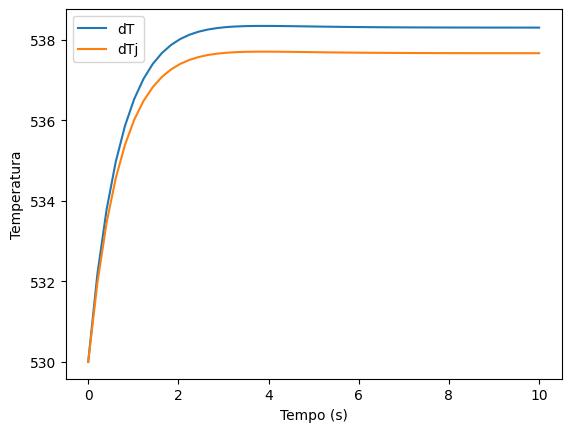

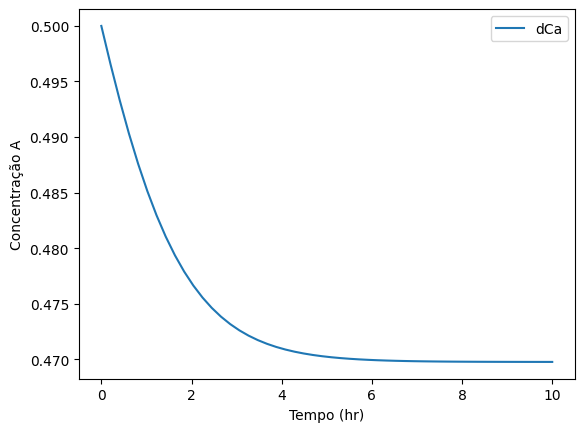

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import exp

    # VARIAVEIS DO REATOR

CAo    = 0.5    # Concentração do fluido A na entrada;
rho    = 50.0    # Densidade do fluido A;
_u      = 150.0    # Energia;
_a      = 250.0    # Área do reator;
_v      = 48.0    # Volume interno do Reator;
Fo     = 40.0    # Fluxo na entrada do reator;
To     = 530.0
lbd     = -3e4 

    # VARIAVEIS DA CAMISA

Fj     = 49.9    # Fluxo da camisa;
Vj     = 3.85    # Volume da camisa;
Cj     = 1.0       # Concentração do fluido refrigerante
Cp     = 0.75
rhoj   = 62.3    # Densidade do fluido refrigerante;
Toj    = 530.0

# Cálculo da taxa de reação de Arrhenius
def k(T):
    E       = 3e4        # activation energy J/gmol
    R       = 1.99      # gas constant J/gmol/K
    alfa      = 7.8e10    # Arrhenius rate constant 1/min
    return alfa * np.exp(-E/R/T)

def odes(x,t):

    Ca  = x[0] # Concentração interna do reator;
    Tj  = x[2] # Temperatura interna jaqueta;
    T   = x[1] # Temperatura interna do reator;

    # if T < 800:
    #     ko = k(T)
    # else:
    #     ko = 0.1
    ko = k(T)

    dCadt  = (Fo/_v) * (CAo - Ca) - (ko * Ca)
    dTdt   = (Fo/_v) * (To - T) - (Ca * lbd * ko)/(rho * Cp) - (_u * _a) * (T - Tj)/(rho * Cp * _v)
    dTjdt  = (Fj/Vj) * (Toj - Tj) + (_u * _a) * (T - Tj)/(rhoj * Cj * Vj)

    return dCadt, dTdt, dTjdt


x0 = [0.5,530, 530]
t = np.linspace(0,10)
x = odeint(odes, x0, t)
# x, infodict = odeint(odes, x0, t, full_output = True)

data = pd.DataFrame(x)
print(data)


A = x[:,0]
B = x[:,1]
C = x[:,2]

# print(f"o valor de A ==> {A}")
# print(f"o valor de B ==> {B}")
# print(f"o valor de C ==> {C}")

plt.plot(t,B,label='dT')
plt.plot(t,C,label='dTj')
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura")
plt.show()

plt.plot(t,A,label='dCa')
plt.legend()
plt.xlabel("Tempo (hr)")
plt.ylabel("Concentração A")
plt.show()
plt.show()
